<a href="https://colab.research.google.com/github/CriptoQuant/Informacion-Cuantica/blob/main/3qubits_ErrorAmplitud_1qubit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

In [2]:

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate

In [176]:
n=5
qc = QuantumCircuit(n,3)

#qc.x(0)
qc.barrier()

#Aplicar las puertas H a los qubits
for i in range (n-3):
  qc.cx(0,i+1)

qc.barrier()

#Error
qc.x(0)

qc.barrier()

# Calcular el síndrome
qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)

qc.barrier()

# Mediciones de qubits ancilla
qc.measure(3,0)
qc.measure(4,1)
qc.barrier()

sim = Aer.get_backend('qasm_simulator')

my_circuit = transpile(qc, sim)
job = sim.run(my_circuit)

result = job.result()
counts = result.get_counts()
print("Resultados:", counts)

# Corrección del error
qc.x(0)
qc.barrier()

# Mediciones de los qubits
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.barrier()



my_circuit1 = transpile(qc, sim)
job1 = sim.run(my_circuit1)

result1 = job1.result()
counts1 = result1.get_counts()
print("Resultados despues de correccion:", counts1)

Resultados: {'011': 1024}
Resultados despues de correccion: {'000': 1024}


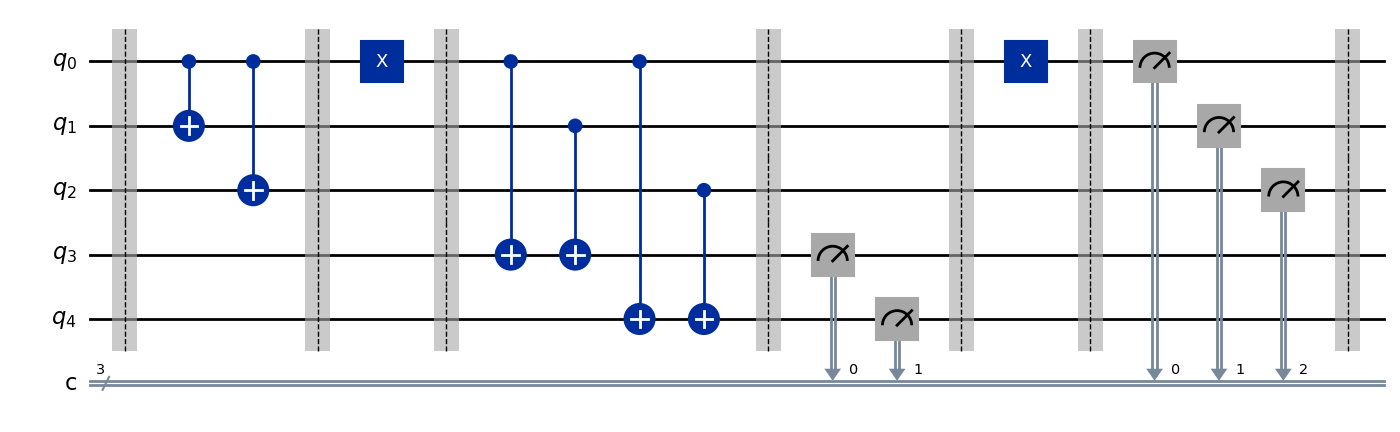

In [177]:

# Dibujar el circuito
qc.draw('mpl')

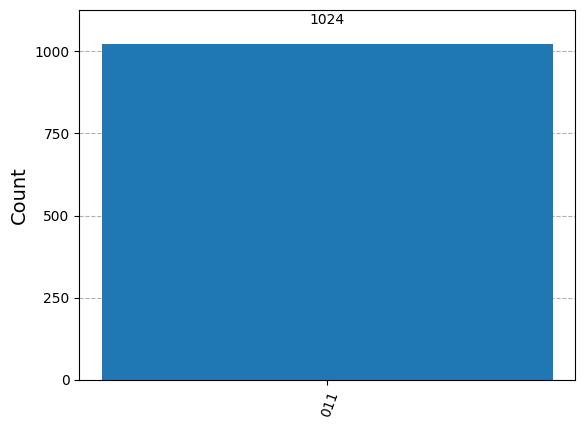

In [169]:
plot_histogram(counts)


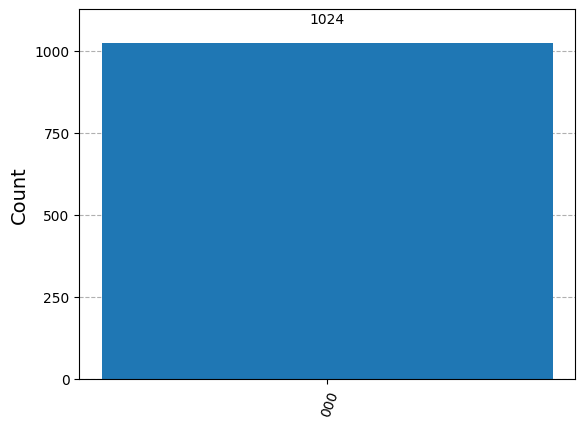

In [170]:
plot_histogram(counts1)